In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [2]:
mydir = "/Users/ptienpasertkij/Documents/RIT/Summer 2021/BANA785/All Data Files/"
wegmansData = mydir + "WegmansData_TimeSeries.txt"
wegmans = pd.read_csv(wegmansData, sep=" ")

In [3]:
wegmans.DATE_KEY = pd.to_datetime(wegmans.DATE_KEY,format='%Y-%m-%d')

In [4]:
wegmans = wegmans.sort_values(['DATE_KEY','DEPARTMENT_NAME','CATEGORY_NAME'])

In [5]:
wegmansnew = wegmans.groupby([pd.Grouper(key='DATE_KEY',freq='d'),'DEPARTMENT_NAME', 'CATEGORY_NAME','monthyear'])['SALES'].sum().reset_index()

In [6]:
wegmansnew['Yesterday Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift()
wegmansnew['Week Ago Sales'] = wegmansnew.groupby(['CATEGORY_NAME'])['SALES'].shift(7)

In [7]:
wegmansnew['Yesterday Sales'].fillna(0, inplace = True)
wegmansnew['Week Ago Sales'].fillna(0, inplace = True)

In [8]:
wegmansnew['isWeekend'] = (wegmansnew['DATE_KEY'].dt.dayofweek >= 5)

In [9]:
wegmansnew.monthyear = pd.to_datetime(wegmansnew.monthyear,format='%Y/%m')

In [10]:
wegmansnew

,DATE_KEY,DEPARTMENT_NAME,CATEGORY_NAME,monthyear,SALES,Yesterday Sales,Week Ago Sales,isWeekend
0,2019-01-06,ASIAN,ASIAN HOT,2019-01-01,1.43,0.00,0.00,True
1,2019-01-06,ASIAN,ASIAN PACKAGED,2019-01-01,91.42,0.00,0.00,True
2,2019-01-06,BAKESHOP,BAGELS,2019-01-01,25.26,0.00,0.00,True
3,2019-01-06,BAKESHOP,BAKESHOP COOKIES,2019-01-01,39.06,0.00,0.00,True
4,2019-01-06,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,2019-01-01,56.65,0.00,0.00,True
...,...,...,...,...,...,...,...,...
300640,2020-12-31,SUSHI,SKINNY ROLLS SUSHI,2020-12-01,6.47,12.94,11.50,False
300641,2020-12-31,SUSHI,VEGGIE SUSHI,2020-12-01,16.52,25.15,25.14,False
300642,2020-12-31,ULTIMATE COFFEE,BREAKFAST,2020-12-01,6.46,3.23,3.23,False
300643,2020-12-31,ULTIMATE COFFEE,COLD DRINKS,2020-12-01,2.12,1.69,4.60,False


In [11]:
wegmansmonth = wegmansnew.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME', 'CATEGORY_NAME'])['SALES'].sum().reset_index()

In [12]:
wegmansmonth['Last Month Sales'] = wegmansmonth.groupby(['CATEGORY_NAME'])['SALES'].shift()

In [13]:
wegmansmonth['Last Month Sales'].fillna(0, inplace = True)

In [14]:
wegmansmonth

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales
0,2019-01-01,ASIAN,ASIAN HOT,31.51,0.00
1,2019-01-01,ASIAN,ASIAN PACKAGED,1890.30,0.00
2,2019-01-01,BAKESHOP,BAGELS,364.80,0.00
3,2019-01-01,BAKESHOP,BAKESHOP COOKIES,1200.90,0.00
4,2019-01-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,709.93,0.00
...,...,...,...,...,...
13131,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12
13132,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37
13133,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,168.73,178.69
13134,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09


In [15]:
wegmansmonth_dept = wegmansmonth.groupby([pd.Grouper(key='monthyear',freq='MS'),'DEPARTMENT_NAME'])['SALES'].sum().reset_index()

In [16]:
wegmansmonth_dept['Last Month Sales'] = wegmansmonth_dept.groupby(['DEPARTMENT_NAME'])['SALES'].shift()

In [17]:
wegmansmonth_dept['Last Month Sales'].fillna(0, inplace = True)

In [18]:
wegmansmonth_dept

,monthyear,DEPARTMENT_NAME,SALES,Last Month Sales
0,2019-01-01,ASIAN,1921.81,0.00
1,2019-01-01,BAKESHOP,13406.94,0.00
2,2019-01-01,BEER & WINE COOLERS,10705.80,0.00
3,2019-01-01,BEVERAGE CONTAINER RETURNS,0.00,0.00
4,2019-01-01,BULK FOODS,4063.91,0.00
...,...,...,...,...
1026,2020-12-01,"SALADS, SANDWICHES & SOUPS",5081.23,4529.79
1027,2020-12-01,SPECIAL PROMOTIONS,21.60,0.00
1028,2020-12-01,SUSHI,6255.57,5825.15
1029,2020-12-01,ULTIMATE COFFEE,308.94,383.42


In [19]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor

In [20]:
from sklearn.metrics import mean_squared_error
def rmsle(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

In [21]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(wegmansmonth['CATEGORY_NAME'])
wegmansmonth['CATCODES'] = le.transform(wegmansmonth['CATEGORY_NAME'])
le.fit(wegmansmonth['DEPARTMENT_NAME'])
wegmansmonth['DEPTCODES'] = le.transform(wegmansmonth['DEPARTMENT_NAME'])

In [22]:
wegmansmonth

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES
0,2019-01-01,ASIAN,ASIAN HOT,31.51,0.00,14,0
1,2019-01-01,ASIAN,ASIAN PACKAGED,1890.30,0.00,15,0
2,2019-01-01,BAKESHOP,BAGELS,364.80,0.00,23,1
3,2019-01-01,BAKESHOP,BAKESHOP COOKIES,1200.90,0.00,26,1
4,2019-01-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,709.93,0.00,27,1
...,...,...,...,...,...,...,...
13131,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,52,42
13132,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,112,42
13133,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,168.73,178.69,267,42
13134,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,435,42


In [23]:
pip install python-dateutil

Note: you may need to restart the kernel to use updated packages.


In [24]:
from dateutil.relativedelta import relativedelta

In [25]:
start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error = []

while dateidx <= end_date:
    train = wegmansmonth[(wegmansmonth['monthyear'] < pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] > pd.Timestamp(dateidx))]
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    p = val['Last Month Sales'].values

    error = rmsle(val['SALES'].values, p)
 
    print('Month %s - Error %.2f' % (str(dateidx), error))
    mean_error.append(error)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error))

Month 2019-02-01 - Error 688.59
Month 2019-03-01 - Error 744.27
Month 2019-04-01 - Error 812.38
Month 2019-05-01 - Error 996.41
Month 2019-06-01 - Error 829.75
Month 2019-07-01 - Error 851.17
Month 2019-08-01 - Error 860.39
Month 2019-09-01 - Error 869.32
Month 2019-10-01 - Error 769.31
Month 2019-11-01 - Error 874.16
Month 2019-12-01 - Error 1147.46
Month 2020-01-01 - Error 1045.97
Month 2020-02-01 - Error 793.06
Month 2020-03-01 - Error 1177.12
Mean Error = 889.96


In [26]:
wegmansmonth

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES
0,2019-01-01,ASIAN,ASIAN HOT,31.51,0.00,14,0
1,2019-01-01,ASIAN,ASIAN PACKAGED,1890.30,0.00,15,0
2,2019-01-01,BAKESHOP,BAGELS,364.80,0.00,23,1
3,2019-01-01,BAKESHOP,BAKESHOP COOKIES,1200.90,0.00,26,1
4,2019-01-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,709.93,0.00,27,1
...,...,...,...,...,...,...,...
13131,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,52,42
13132,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,112,42
13133,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,168.73,178.69,267,42
13134,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,435,42


In [27]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error = []
wegmansrf = pd.DataFrame() 

while dateidx <= end_date:
    train = wegmansmonth[(wegmansmonth['monthyear'] <= pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] >= pd.Timestamp(dateidx))]
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    if val.size > 0:
        xtr, xts = train[['CATCODES','Last Month Sales']], val[['CATCODES','Last Month Sales']]
        ytr, yts = train['SALES'].values, val['SALES'].values
    
        mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
        mdl.fit(xtr, ytr)

        p = mdl.predict(xts)
    
        val.loc[:, 'Prediction'] = np.round(p)
        wegmansrf = pd.concat([wegmansrf,val])
        error = rmsle(yts, p)
        print('Month %s - Error %.2f' % (str(dateidx), error))
        mean_error.append(error)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error))

Month 2019-02-01 - Error 491.90
Month 2019-03-01 - Error 520.43
Month 2019-04-01 - Error 634.80
Month 2019-05-01 - Error 460.92
Month 2019-06-01 - Error 489.79
Month 2019-07-01 - Error 583.01
Month 2019-08-01 - Error 488.83
Month 2019-09-01 - Error 434.35
Month 2019-10-01 - Error 416.45
Month 2019-11-01 - Error 400.20
Month 2019-12-01 - Error 545.46
Month 2020-01-01 - Error 509.67
Month 2020-02-01 - Error 366.69
Month 2020-03-01 - Error 560.42
Mean Error = 493.07


In [28]:
wegmansrf.to_csv('prepandemic_30daywindow.csv')

In [29]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,4,1)
end_date = datetime.date(2020,12,1)
delta = relativedelta(months=+1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)] 
    if val.size > 0:
        xts = val[['CATCODES','Last Month Sales']]
        p = mdl.predict(xts)
        val.loc[:, 'Prediction'] = np.round(p)
        wegmansrf = pd.concat([wegmansrf,val])
    dateidx += delta

2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01


In [30]:
wegmansrf.to_csv('2019and2020predictions_30dayswindow.csv')

In [31]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2019,2,1)
end_date = datetime.date(2020,3,1)
delta = relativedelta(months=+1)
dateidx = start_date

mean_error_lgbm = []
wegmanslgbm = pd.DataFrame() 

while dateidx <= end_date:
    train_lgbm = wegmansmonth[(wegmansmonth['monthyear'] <= pd.Timestamp(dateidx)) & (wegmansmonth['monthyear'] >= pd.Timestamp(dateidx))]
    val_lgbm = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)]
    
    if val_lgbm.size > 0:
        xtr_lgbm, xts_lgbm = train_lgbm[['CATCODES','Last Month Sales']], val_lgbm[['CATCODES','Last Month Sales']]
        ytr_lgbm, yts_lgbm = train_lgbm['SALES'].values, val_lgbm['SALES'].values
    
        mdl_lgbm = LGBMRegressor(n_estimators=1000, learning_rate=0.15)
        mdl_lgbm.fit(xtr_lgbm, np.log1p(ytr_lgbm))

        p_lgbm = np.expm1(mdl_lgbm.predict(xts_lgbm))
    
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanslgbm = pd.concat([wegmanslgbm,val_lgbm])
        error_lgbm = rmsle(yts_lgbm, p_lgbm)
        print('Month %s - Error %.2f' % (str(dateidx), error_lgbm))
        mean_error_lgbm.append(error_lgbm)
    dateidx += delta
print('Mean Error = %.2f' % np.mean(mean_error_lgbm))

Month 2019-02-01 - Error 399.54
Month 2019-03-01 - Error 351.87
Month 2019-04-01 - Error 424.26
Month 2019-05-01 - Error 632.63
Month 2019-06-01 - Error 592.00
Month 2019-07-01 - Error 355.36
Month 2019-08-01 - Error 467.54
Month 2019-09-01 - Error 290.87
Month 2019-10-01 - Error 282.56
Month 2019-11-01 - Error 368.37
Month 2019-12-01 - Error 397.41
Month 2020-01-01 - Error 361.57
Month 2020-02-01 - Error 313.89
Month 2020-03-01 - Error 421.35
Mean Error = 404.23


In [32]:
pd.set_option('mode.chained_assignment',None)

start_date = datetime.date(2020,4,1)
end_date = datetime.date(2020,12,31)
delta = relativedelta(months=+1)
dateidx = start_date

while dateidx <= end_date:
    print(dateidx)
    val_lgbm = wegmansmonth[wegmansmonth['monthyear'] == pd.Timestamp(dateidx)] 
    if val_lgbm.size > 0:
        xts_lgbm = val_lgbm[['CATCODES','Last Month Sales']]
        p_lgbm = mdl_lgbm.predict(xts_lgbm)
        val_lgbm.loc[:, 'Prediction'] = np.round(p_lgbm)
        wegmanslgbm = pd.concat([wegmanslgbm,val_lgbm])
    dateidx += delta

2020-04-01
2020-05-01
2020-06-01
2020-07-01
2020-08-01
2020-09-01
2020-10-01
2020-11-01
2020-12-01


In [33]:
wegmanslgbm.to_csv('2019and2020pred_30daywindow_lbgbm.csv')

In [34]:
wegmanslgbm

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES,Prediction
546,2019-02-01,ASIAN,ASIAN HOT,53.70,31.51,14,0,63.0
547,2019-02-01,ASIAN,ASIAN PACKAGED,1779.05,1890.30,15,0,1480.0
548,2019-02-01,BAKESHOP,BAGELS,388.73,1845.58,23,1,563.0
549,2019-02-01,BAKESHOP,BAKESHOP COOKIES,1521.38,1200.90,26,1,1236.0
550,2019-02-01,BAKESHOP,BAKESHOP DISTRIBUTION ITEMS,747.84,709.93,27,1,649.0
...,...,...,...,...,...,...,...,...
13131,2020-12-01,ULTIMATE COFFEE,BREAKFAST,80.40,123.12,52,42,5.0
13132,2020-12-01,ULTIMATE COFFEE,COLD DRINKS,41.11,46.37,112,42,4.0
13133,2020-12-01,ULTIMATE COFFEE,HOT DRINKS,168.73,178.69,267,42,4.0
13134,2020-12-01,ULTIMATE COFFEE,RETAIL ITEMS,18.70,33.09,435,42,3.0


In [41]:
lgbmpredactual = wegmanslgbm.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

In [35]:
rfpredactual = wegmansrf.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

In [36]:
rfpredactual

,monthyear,SALES,Prediction
0,2019-02-01,1185.593165,1171.273056
1,2019-03-01,1301.477918,1277.197509
2,2019-04-01,1265.911655,1234.161871
3,2019-05-01,1328.619839,1305.982079
4,2019-06-01,1342.404838,1329.527076
5,2019-07-01,1352.550491,1330.540000
6,2019-08-01,1297.266876,1273.281867
7,2019-09-01,1252.045704,1232.613718
8,2019-10-01,1253.029982,1233.737319
9,2019-11-01,1321.322806,1307.588129


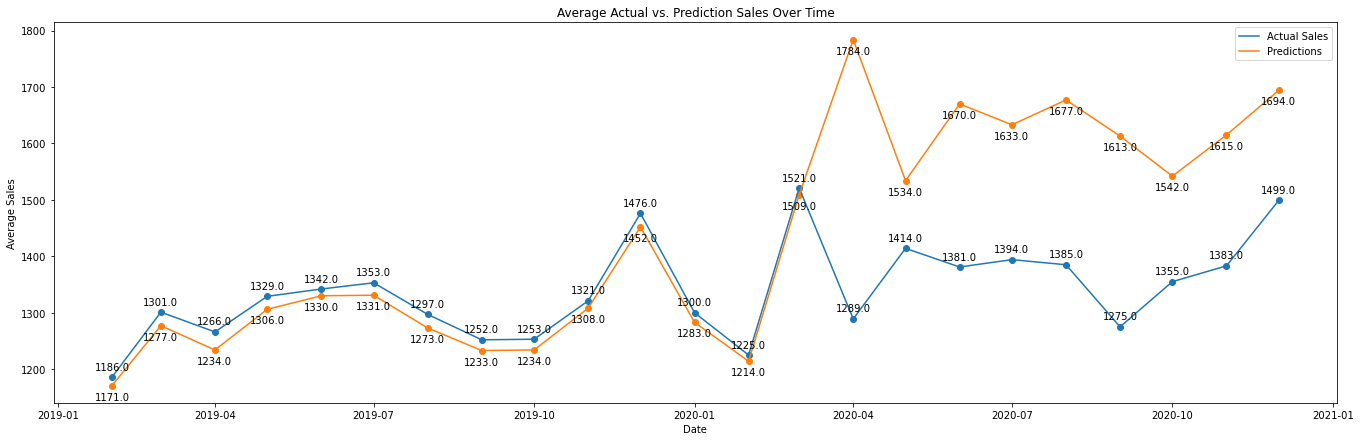

In [53]:
rfpredactual["monthyear"] =  pd.to_datetime(rfpredactual["monthyear"])
x = rfpredactual['monthyear']
y = round(rfpredactual['SALES'])
y1 = round(rfpredactual['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x,y)
plt.scatter(x,y1)
plt.plot(x, y)
plt.plot(x, y1)

for i, label in enumerate(y):
    plt.annotate(label, (x[i], y[i]+13),ha='center')
    
for i, label in enumerate(y1):
    plt.annotate(label, (x[i], y1[i]-25),ha='center')

plt.title("Average Actual vs. Prediction Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [68]:
wegmansrf_digital = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'DIGITAL FULFILLMENT')]

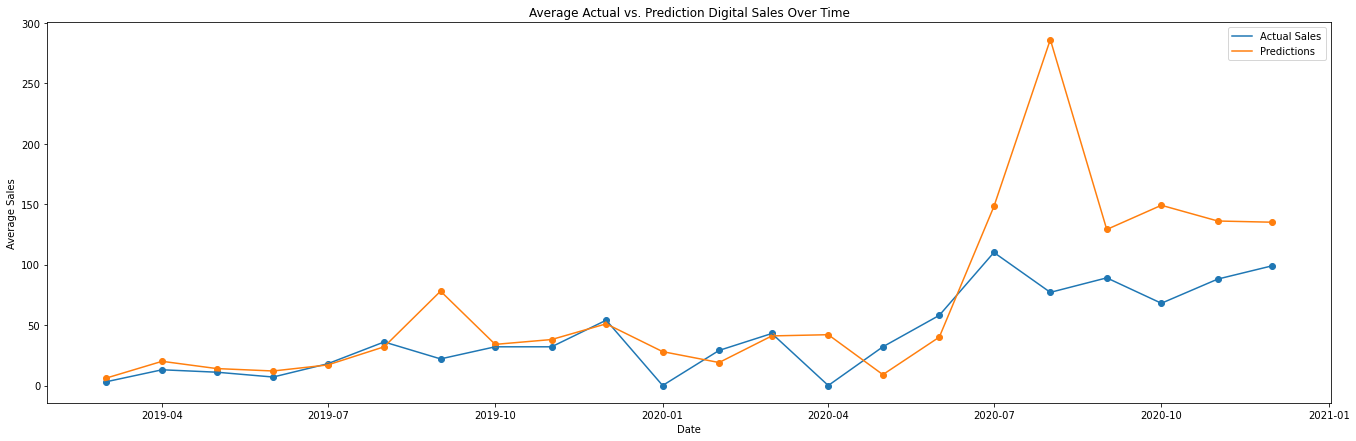

In [69]:
wegmansrf_digital["monthyear"] =  pd.to_datetime(wegmansrf_digital["monthyear"])
x_date = wegmansrf_digital['monthyear']
y = round(wegmansrf_digital['SALES'])
y_pred = round(wegmansrf_digital['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Digital Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [70]:
wegmansrf_rest = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'RESTAURANTS')]

In [78]:
wegmansrf_rest = wegmansrf_rest.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

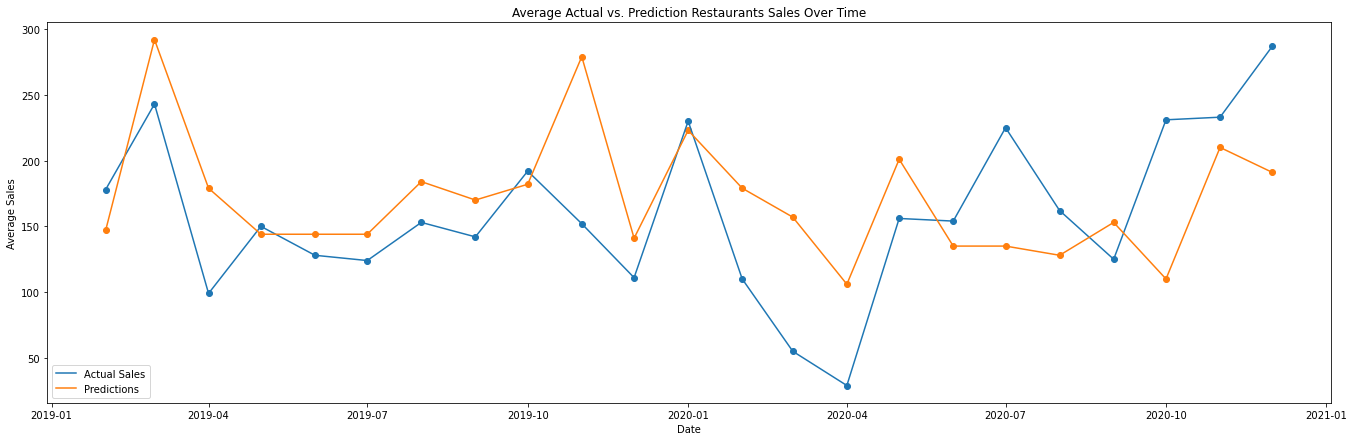

In [80]:
wegmansrf_rest["monthyear"] =  pd.to_datetime(wegmansrf_rest["monthyear"])
x_date = wegmansrf_rest['monthyear']
y = round(wegmansrf_rest['SALES'])
y_pred = round(wegmansrf_rest['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Restaurants Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [106]:
wegmansrf_restall = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'RESTAURANTS')]

In [107]:
wegmansrf_restamore = wegmansrf_restall[(wegmansrf_restall["CATEGORY_NAME"] == 'AMORE')]

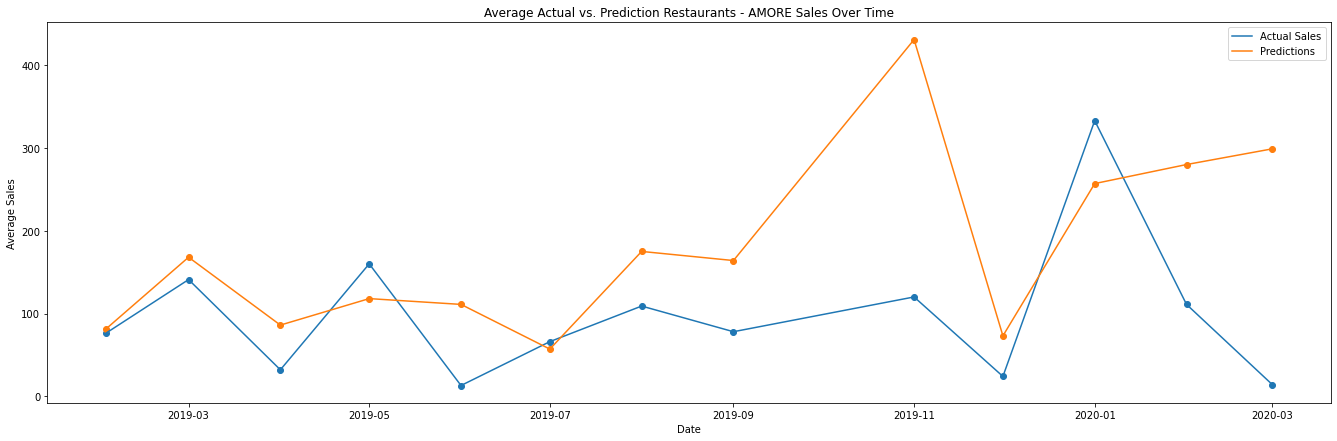

In [109]:
wegmansrf_restamore["monthyear"] =  pd.to_datetime(wegmansrf_restamore["monthyear"])
x_date = wegmansrf_restamore['monthyear']
y = round(wegmansrf_restamore['SALES'])
y_pred = round(wegmansrf_restamore['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Restaurants - AMORE Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [112]:
wegmansrf_restpub = wegmansrf_restall[(wegmansrf_restall["CATEGORY_NAME"] == 'PUBS')]

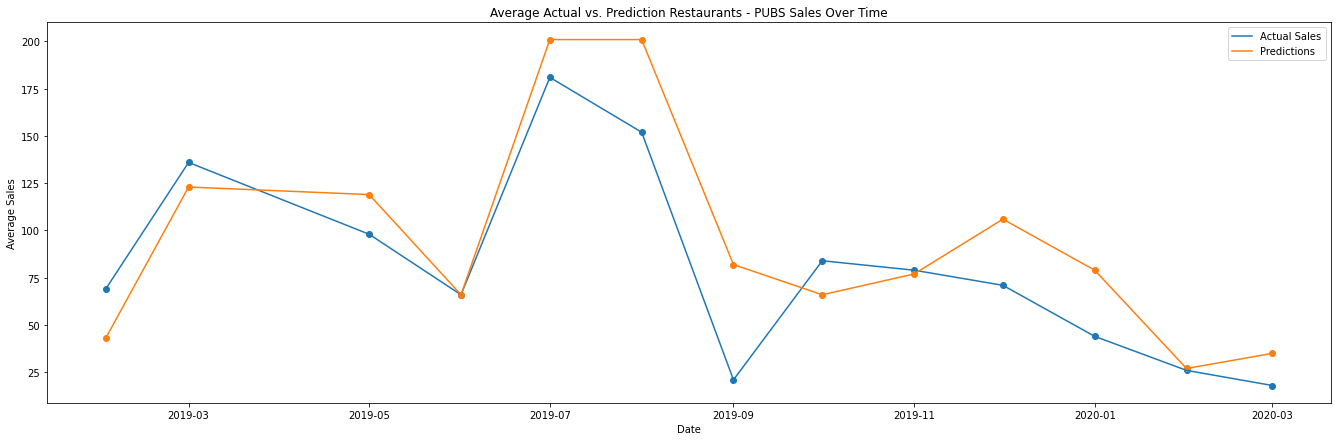

In [114]:
wegmansrf_restpub["monthyear"] =  pd.to_datetime(wegmansrf_restpub["monthyear"])
x_date = wegmansrf_restpub['monthyear']
y = round(wegmansrf_restpub['SALES'])
y_pred = round(wegmansrf_restpub['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Restaurants - PUBS Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [85]:
wegmansrf_wb = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'WBRAND & OTHER')]

In [87]:
wegmansrf_wb = wegmansrf_wb.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

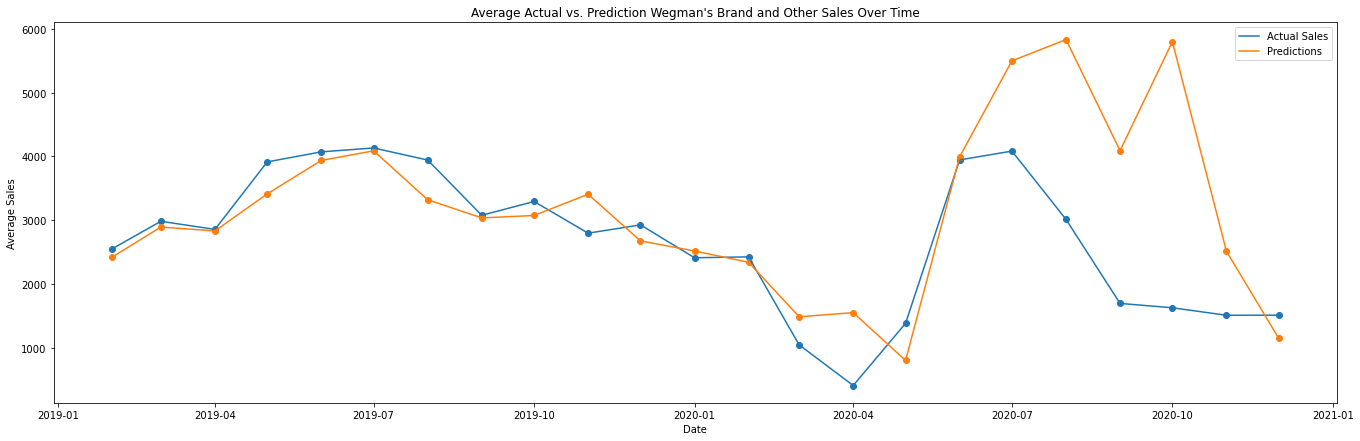

In [91]:
wegmansrf_wb["monthyear"] =  pd.to_datetime(wegmansrf_wb["monthyear"])
x_date = wegmansrf_wb['monthyear']
y = round(wegmansrf_wb['SALES'])
y_pred = round(wegmansrf_wb['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Wegman's Brand and Other Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [116]:
wegmansrf_wball = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'WBRAND & OTHER')]
wegmanswb_selfserve = wegmansrf_wball[(wegmansrf_wball["CATEGORY_NAME"] == 'SELF-SERVE BARS')]

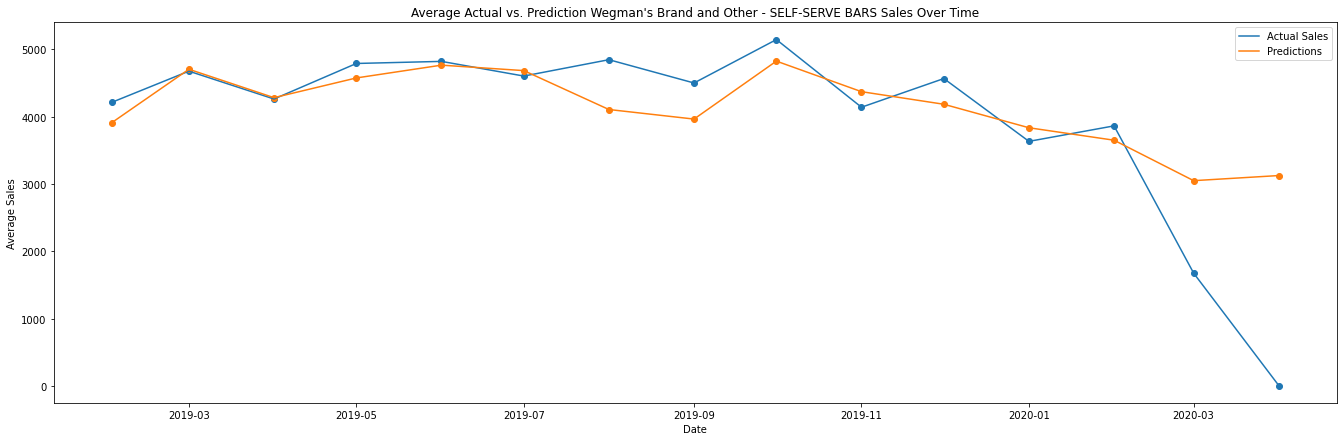

In [117]:
wegmanswb_selfserve["monthyear"] =  pd.to_datetime(wegmanswb_selfserve["monthyear"])
x_date = wegmanswb_selfserve['monthyear']
y = round(wegmanswb_selfserve['SALES'])
y_pred = round(wegmanswb_selfserve['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Wegman's Brand and Other - SELF-SERVE BARS Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [118]:
wegmansrf_wball

,monthyear,DEPARTMENT_NAME,CATEGORY_NAME,SALES,Last Month Sales,CATCODES,DEPTCODES,Prediction
1097,2019-02-01,WBRAND & OTHER,SELF-SERVE BARS,4215.15,3384.04,474,43,3914.0
1098,2019-02-01,WBRAND & OTHER,W BRAND RETAIL,891.50,927.59,563,43,932.0
1659,2019-03-01,WBRAND & OTHER,SELF-SERVE BARS,4676.93,4215.15,474,43,4705.0
1660,2019-03-01,WBRAND & OTHER,W BRAND RETAIL,1293.83,891.50,563,43,1085.0
2215,2019-04-01,WBRAND & OTHER,SELF-SERVE BARS,4262.78,4676.93,474,43,4283.0
2216,2019-04-01,WBRAND & OTHER,W BRAND RETAIL,1453.13,1293.83,563,43,1384.0
2773,2019-05-01,WBRAND & OTHER,SELF-SERVE BARS,4791.41,4262.78,474,43,4576.0
2774,2019-05-01,WBRAND & OTHER,W BRAND RETAIL,3039.33,1453.13,563,43,2252.0
3327,2019-06-01,WBRAND & OTHER,SELF-SERVE BARS,4821.75,4791.41,474,43,4766.0
3328,2019-06-01,WBRAND & OTHER,W BRAND RETAIL,3321.27,3039.33,563,43,3111.0


In [97]:
wegmansrf_rx = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'PHARMACY RX')]

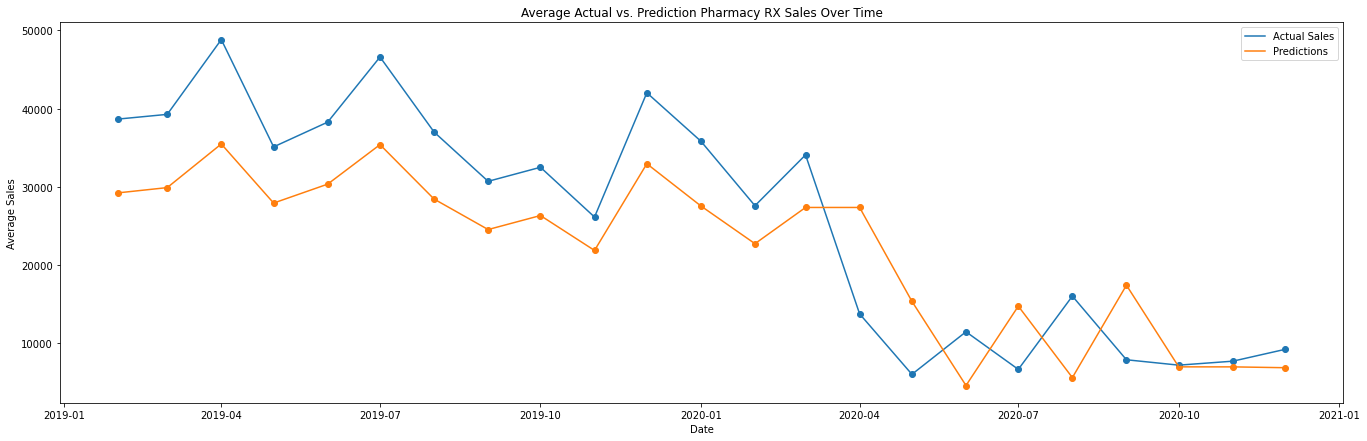

In [98]:
wegmansrf_rx["monthyear"] =  pd.to_datetime(wegmansrf_rx["monthyear"])
x_date = wegmansrf_rx['monthyear']
y = round(wegmansrf_rx['SALES'])
y_pred = round(wegmansrf_rx['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Pharmacy RX Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()

In [99]:
wegmansrf_otc = wegmansrf[(wegmansrf["DEPARTMENT_NAME"] == 'PHARMACY OTC')]

In [101]:
wegmansrf_otc = wegmansrf_otc.groupby(['monthyear'])[['SALES','Prediction']].mean().reset_index()

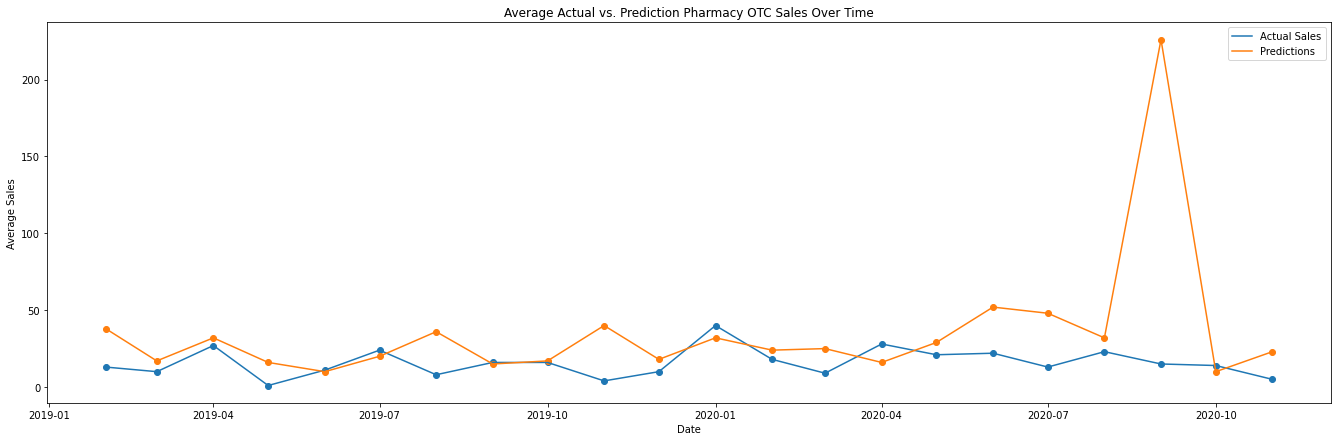

In [103]:
wegmansrf_otc["monthyear"] =  pd.to_datetime(wegmansrf_otc["monthyear"])
x_date = wegmansrf_otc['monthyear']
y = round(wegmansrf_otc['SALES'])
y_pred = round(wegmansrf_otc['Prediction'])


plt.figure(figsize=(23, 7))
plt.scatter(x_date,y)
plt.scatter(x_date,y_pred)
plt.plot(x_date, y)
plt.plot(x_date, y_pred)

plt.title("Average Actual vs. Prediction Pharmacy OTC Sales Over Time")
plt.legend(["Actual Sales", "Predictions"])
plt.xlabel("Date")
plt.ylabel("Average Sales")
plt.show()